In [1]:
import keras
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

from matplotlib import pyplot as plt
from matplotlib import cm

batch_size = 128
num_classes = 10
epochs = 20

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [4]:
x_train = x_train.reshape(60000, 784) # 2次元配列を1次元に変換
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')   # int型をfloat32型に変換
x_test = x_test.astype('float32')
x_train /= 255                        # [0-255]の値を[0.0-1.0]に変換
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_______________

In [7]:
history = model.fit(x_train, y_train,  # 画像とラベルデータ
                    batch_size=batch_size,
                    epochs=epochs,     # エポック数の指定
                    verbose=1,         # ログ出力の指定. 0だとログが出ない
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2455 - acc: 0.9255 - val_loss: 0.1020 - val_acc: 0.9693
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1022 - acc: 0.9694 - val_loss: 0.0864 - val_acc: 0.9747
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0755 - acc: 0.9774 - val_loss: 0.0622 - val_acc: 0.9830
Epoch 4/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0605 - acc: 0.9817 - val_loss: 0.0659 - val_acc: 0.9818
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0502 - acc: 0.9849 - val_loss: 0.0693 - val_acc: 0.9820
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0430 - acc: 0.9869 - val_loss: 0.0819 - val_acc: 0.9807
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1118649610947989
Test accuracy: 0.9827


[4]


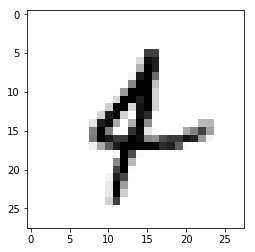

In [9]:
# i番目の画像を　分類してみる
i = 301

# 予測した数字
print(model.predict_classes(x_test[i-1:i,]))

# 実際のイメージ
plt.imshow(x_test[i - 1].reshape(28, 28), cmap=cm.gray_r)